In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read file
#df = pd.read_excel()
#df = pd.read_json()
#df = pd.read_parquet()

df = pd.read_csv('/content/sample_data/Online Retail Data Set.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
#checking for null values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
(df.isnull().mean() * 100).round(2)

,0
InvoiceNo,0.00
StockCode,0.00
Description,0.27
Quantity,0.00
InvoiceDate,0.00
UnitPrice,0.00
CustomerID,24.93
Country,0.00


In [ ]:
#have to drop customerID if me imputate then there will be fake customers so im droping. Description has no much businees impact or just fill unknown

df.dropna(subset=['CustomerID'],inplace=True)
df['Description'].fillna('Unknown')

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df['InvoiceDate'] = pd.to_datetime(
    df['InvoiceDate'],
    format='%d-%m-%Y %H:%M'
)

In [ ]:
#check for duplicate rows
df.duplicated().sum()
#there are 5225 duplicate rows

np.int64(5225)

In [ ]:
#if all these coloums match then only we could say that the row is duplicate
#df.duplicated(
 #   subset=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate']
#).sum()

In [ ]:
#droped duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#no duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#drop irrlevent coloumns here we could drop descriptions but we are not doing
#df.drop(columns=['Description'],inplace=True)

In [ ]:
#checking for outliers
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
#what ever the invoice number starting with c are either cancled or returned product. we need to remove them
cancelled_invoices = df[df['InvoiceNo'].astype(str).str.startswith('C')]
cancelled_invoices_count=cancelled_invoices['InvoiceNo'].nunique()
cancelled_invoices_count

3654

In [ ]:
#return or cancled products as there will be multiple products in the same invoice
cancelled_product_count=cancelled_invoices['Quantity'].abs().sum()
cancelled_product_count

np.int64(273035)

In [ ]:
#cancelled revenue lost
cancelled_invoices['Revenue'] = (
    cancelled_invoices['Quantity'] * cancelled_invoices['UnitPrice']
)

cancelled_revenue=cancelled_invoices['Revenue'].abs().sum()
cancelled_revenue

/tmp/ipython-input-3163604505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_invoices['Revenue'] = (


np.float64(608689.47)

In [ ]:
#making a new data frame by removing all the cancled and return products
sales_df = df[~df['InvoiceNo'].astype(str).str.startswith('C')].copy()

In [ ]:
#information about new sales_df
sales_df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [ ]:
#here unit price is 0 so practically it is impossible
sales_df = sales_df[sales_df['UnitPrice'] > 1]

In [ ]:
#99% people are behiving normally. max order of 80k is not possible so very are removing that 1% people
qty_cap = sales_df['Quantity'].quantile(0.99)
price_cap = sales_df['UnitPrice'].quantile(0.99)

sales_df = sales_df[
    (sales_df['Quantity'] <= qty_cap) &
    (sales_df['UnitPrice'] <= price_cap)
]


In [ ]:
#information about new sales_df after processing
sales_df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,296545.000000,296545.000000
mean,7.963398,3.459468
std,12.302751,2.763306
min,1.000000,1.010000
25%,2.000000,1.650000
50%,4.000000,2.460000
75%,10.000000,4.250000
max,100.000000,16.950000


In [ ]:
#creating a new coloum named revenue in the sales_df
sales_df['Revenue'] = sales_df['Quantity'] * sales_df['UnitPrice']

In [ ]:
#average order value
invoice_revenue = sales_df.groupby('InvoiceNo')['Revenue'].sum()
aov = invoice_revenue.mean()
aov

np.float64(340.97228207584385)

In [ ]:
#how many items one person could buy
basket_size = sales_df.groupby('InvoiceNo')['Quantity'].sum().median()
basket_size


92.0

In [ ]:
#month vs revenue how much revenue we got in these months
sales_df['InvoiceDate'] = pd.to_datetime(
    sales_df['InvoiceDate'],
    dayfirst=True
)
sales_df['Month'] = sales_df['InvoiceDate'].dt.month
sales_df['MonthName'] = sales_df['InvoiceDate'].dt.month_name()

month_revenue = (
    sales_df
    .groupby(['Month', 'MonthName'])['Revenue']
    .sum()
    .reset_index()
)

month_revenue = month_revenue.sort_values('Month')
month_revenue

,Month,MonthName,Revenue
0,1,January,340148.09
1,2,February,332460.05
2,3,March,420628.51
3,4,April,328980.28
4,5,May,497494.01
5,6,June,420706.99
6,7,July,412747.81
7,8,August,435954.55
8,9,September,656696.05
9,10,October,694633.90


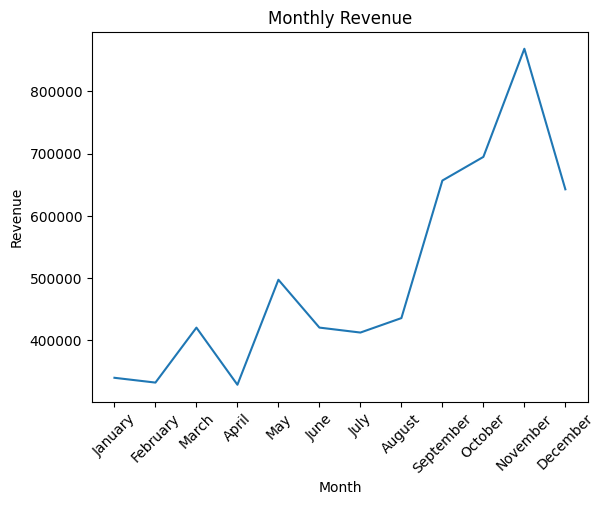

In [ ]:
#plot of monthly revenue vs month
fig,ax=plt.subplots()
ax.plot(month_revenue['MonthName'],month_revenue['Revenue'])
ax.set_xlabel('Month')
ax.set_ylabel('Revenue')
ax.set_title('Monthly Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,December


In [ ]:
#stock code vs the qunatity. which is the best product
stock_qty = (
    sales_df
    .groupby('StockCode')['Quantity']
    .sum()
    .sort_values(ascending=False)
)
top_stock_qty=stock_qty.head(10)
top_stock_qty

,Quantity
StockCode,
85099B,29758
85123A,23455
84879,21695
22178,17214
20725,16826
23203,15128
22386,13748
84946,13700
47566,13429


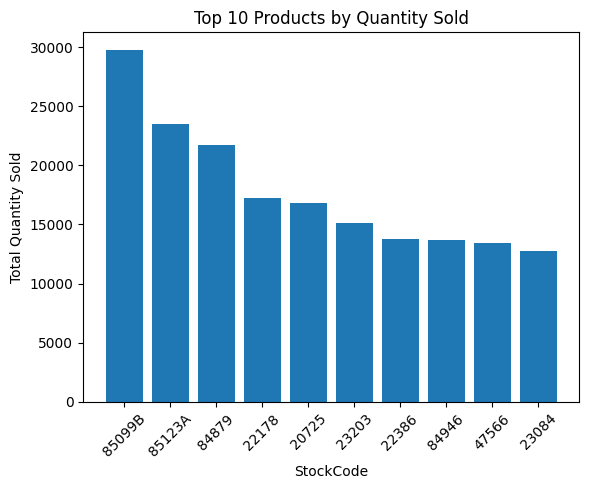

In [ ]:
# graph of quantity sold and the product
fig,ax=plt.subplots()
ax.bar(top_stock_qty.index.astype(str), top_stock_qty.values)
ax.set_xlabel('StockCode')
ax.set_ylabel('Total Quantity Sold')
ax.set_title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# customer id vs revenue
customer_revenue = (
    sales_df
    .groupby('CustomerID')['Revenue']
    .sum()
    .sort_values(ascending=False)
)
top_customer_revenue=customer_revenue.head(10)
top_customer_revenue

,Revenue
CustomerID,
14646.0,138801.37
14911.0,109162.17
17511.0,65097.48
14156.0,63785.07
12415.0,57795.69
15311.0,51128.94
13089.0,50158.33
14096.0,49586.17
14088.0,49349.68


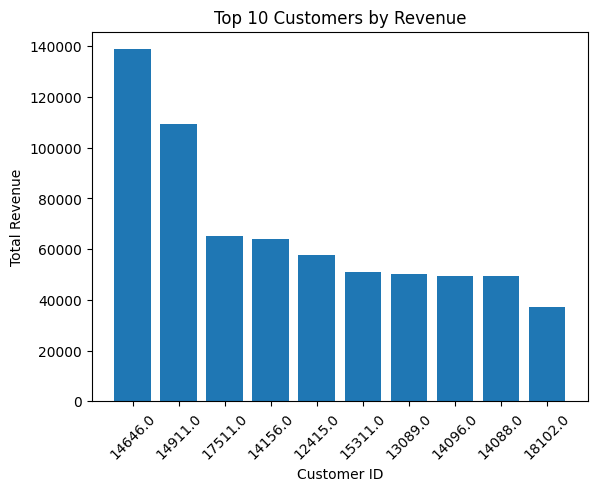

In [ ]:
fig,ax=plt.subplots()
ax.bar(top_customer_revenue.index.astype(str),top_customer_revenue.values)
ax.set_xlabel('Customer ID')
ax.set_ylabel('Total Revenue')
ax.set_title('Top 10 Customers by Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#country vs revenue
county_revenue = (
    sales_df
    .groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
)
county_revenue_top=county_revenue.head(10)
county_revenue_top

,Revenue
Country,
United Kingdom,5011714.11
EIRE,176558.93
Germany,173600.03
France,149092.13
Netherlands,142819.15
Australia,68987.51
Switzerland,45993.32
Spain,39571.70
Belgium,33763.47


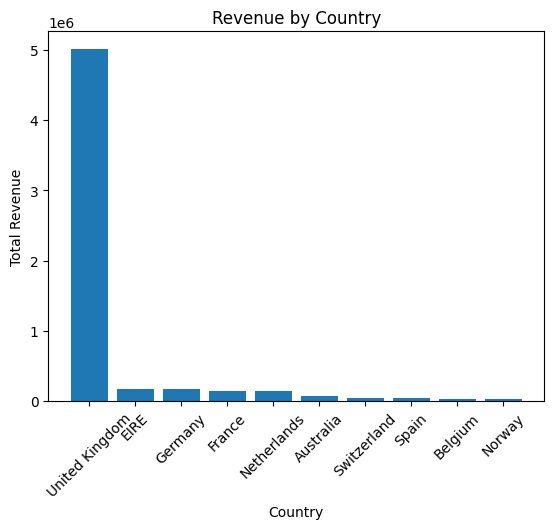

In [ ]:
#graph between county and revenue
fig,ax=plt.subplots()
ax.bar(county_revenue_top.index.astype(str),county_revenue_top.values)
ax.set_xlabel('Country')
ax.set_ylabel('Total Revenue')
ax.set_title('Revenue by Country')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#country wise revenue contrubution
country_pct = (county_revenue / county_revenue.sum()) * 100
country_pct_top=country_pct.head(10)
country_pct_top

,Revenue
Country,
United Kingdom,82.821342
EIRE,2.917734
Germany,2.868836
France,2.463830
Netherlands,2.360165
Australia,1.140057
Switzerland,0.760065
Spain,0.653944
Belgium,0.557960


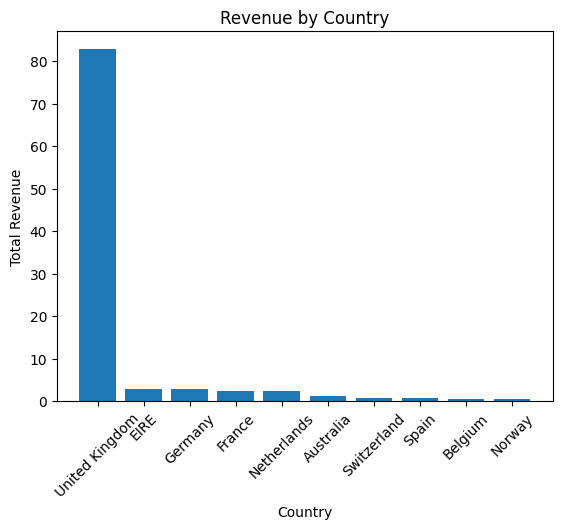

In [ ]:
#graph between county and revenue in percentage
fig,ax=plt.subplots()
ax.bar(country_pct_top.index.astype(str),country_pct_top.values)
ax.set_xlabel('Country')
ax.set_ylabel('Total Revenue')
ax.set_title('Revenue by Country')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,MonthName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,December
